**Mount Google Drive in Google Colab for Accessing Files**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Libraries**

In [2]:
# Importing essential libraries for data processing, image handling, and visualization
import os  # For operating system interactions like file/directory handling
import cv2  # OpenCV library for image processing
import random  # For generating random numbers or shuffling data
import numpy as np  # For numerical operations on arrays and matrices
import pandas as pd  # For data manipulation and analysis
from tqdm import tqdm  # For displaying progress bars during iterations
import matplotlib.pyplot as plt  # For creating plots and visualizations

**Define Data Path and Explore Categories**

In [3]:
# Define the path to the dataset directory
data_path = "/content/drive/MyDrive/CVPR/Assignment1_KNN/Animals"

# Iterate through each category (subdirectory) in the dataset path
for c in os.listdir(data_path):
    # Print the name of the current category
    print("Category:", c)

    # Construct the full path to the current category
    path = os.path.join(data_path, c)
    print("Path:", path)

    # Get the index of the current category in the directory listing
    class_index = os.listdir(data_path).index(c)
    print("Class index:", class_index)

Category: Lion
Path: /content/drive/MyDrive/CVPR/Assignment1_KNN/Animals/Lion
Class index: 0
Category: Jaguar
Path: /content/drive/MyDrive/CVPR/Assignment1_KNN/Animals/Jaguar
Class index: 1
Category: Cheetah
Path: /content/drive/MyDrive/CVPR/Assignment1_KNN/Animals/Cheetah
Class index: 2
Category: Leopard
Path: /content/drive/MyDrive/CVPR/Assignment1_KNN/Animals/Leopard
Class index: 3
Category: Tiger
Path: /content/drive/MyDrive/CVPR/Assignment1_KNN/Animals/Tiger
Class index: 4


**Explore Sample Images**

Image: pexels-photo-3275319.jpeg
Image path: /content/drive/MyDrive/CVPR/Assignment1_KNN/Animals/Tiger/pexels-photo-3275319.jpeg
<class 'numpy.ndarray'>
(730, 500, 3)
Grayscale image shape: (730, 500)


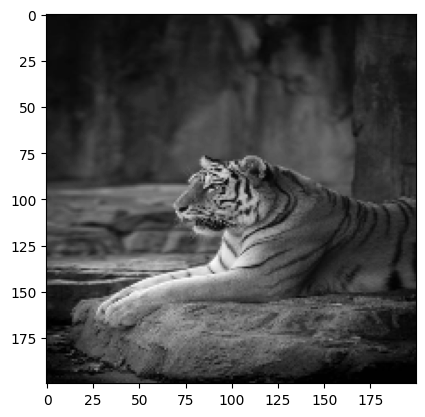

In [4]:
# Loop through each image in the specified directory
for img in os.listdir(path):
    # Print the name of the current image file
    print("Image:", img)

    # Construct the full path of the image
    img_path = os.path.join(path, img)
    print("Image path:", img_path)

    # Read the image using OpenCV (returns a NumPy array)
    img_array = cv2.imread(img_path)
    print(type(img_array))  # Print the type of the image array (should be <class 'numpy.ndarray'>)
    print(img_array.shape)  # Print the dimensions of the image array

    # Convert the image from BGR (default OpenCV format) to grayscale
    img_array_gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    print("Grayscale image shape:", img_array_gray.shape)  # Print the dimensions of the grayscale image

    # Resize the grayscale image to have a height of 200 pixels
    # (The width parameter is currently set incorrectly to 200, which will cause an error.)
    img_array_gray = cv2.resize(img_array_gray, (200, 200))  # This needs to be fixed for proper resizing.

    # Display the grayscale image using Matplotlib
    plt.imshow(img_array_gray, cmap='gray')  # Display the image in grayscale color mapping
    plt.show()  # Render the image display

    # Break the loop after processing the first image for testing purposes
    break


**Load and Preprocess Dataset**

In [5]:
# Initialize an empty list to store training data
train_data = []

# Get the list of categories (subdirectories) in the dataset path
categories = os.listdir(data_path)

# Load the dataset
for c in categories:  # Loop through each category
    # Construct the full path for the current category
    path = os.path.join(data_path, c)

    # Check if the path is a directory (ignores files in the dataset path)
    if os.path.isdir(path):
        # Iterate through each image in the category directory with a progress bar
        for img in tqdm(os.listdir(path)):
            # Construct the full path for the current image
            img_path = os.path.join(path, img)

            # Read the image using OpenCV
            img_array = cv2.imread(img_path)

            # Convert the image to grayscale
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

            # Resize the grayscale image to 200x200 pixels
            img_array = cv2.resize(img_array, (200, 200))

            # Append the processed image and its category to the training data
            train_data.append((img_array, c))
print("\n\n-----------------")
print("Total image: ",len(train_data))
print("-----------------")

100%|██████████| 39/39 [00:00<00:00, 42.88it/s]



-----------------
Total image:  170
-----------------


**Shuffle the training data to randomize the order**

In [6]:
# Shuffle the training data to randomize the order
random.shuffle(train_data)

**Visualize a Grid of Images**

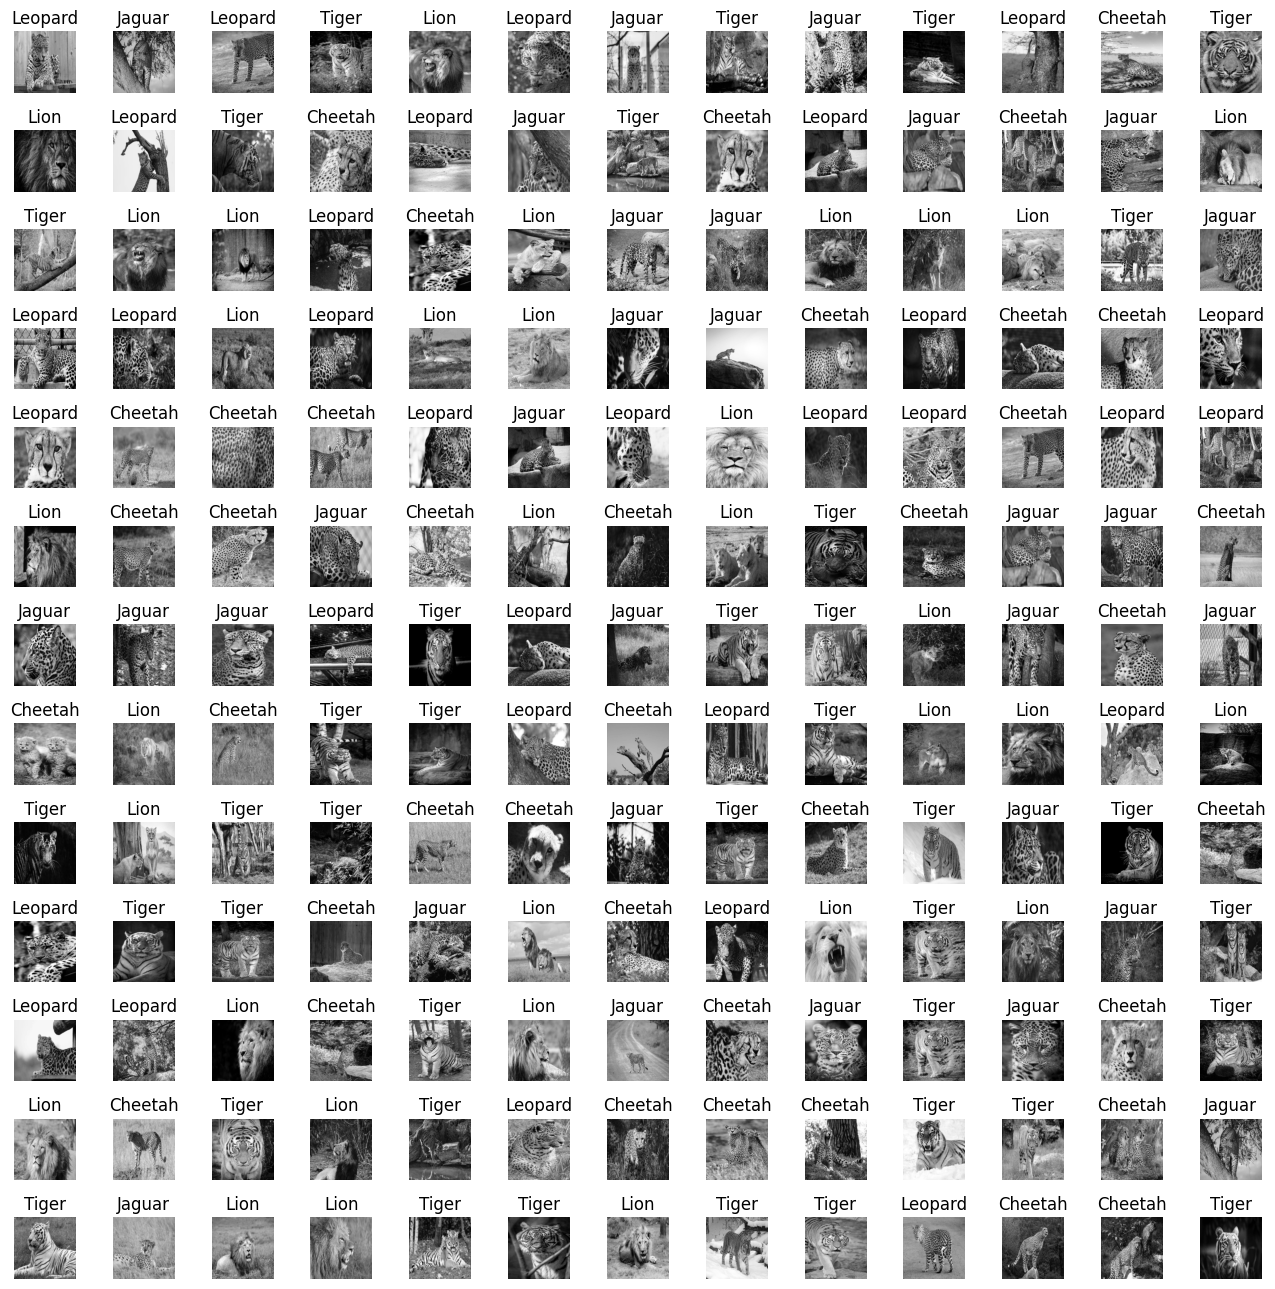

In [7]:
# Determine the total number of images in the training data
num_images = len(train_data)

# Set the grid size (maximum images to display is 169)
grid_size = min(num_images, 169)

# Set the figure size for the grid display
plt.figure(figsize=(13, 13))

# Initialize an index counter
i = 0

# Loop through rows and columns to create a 13x13 grid
for r in range(13):
    for c in range(13):
        # Stop if the index exceeds the number of images to display
        if i >= grid_size:
            break

        # Add a subplot for each image
        plt.subplot(13, 13, i + 1)

        # Display the grayscale image
        plt.imshow(train_data[i][0], cmap='gray')

        # Set the title as the category name
        plt.title(train_data[i][1])

        # Turn off the axis for better visualization
        plt.axis('off')

        # Increment the index counter
        i += 1

# Adjust spacing between plots and show the grid
plt.tight_layout()
plt.show()


**Split Data into 5 Folds**

In [8]:
# Calculate the size of each fold by dividing the dataset into 5 equal parts
fold_size = len(train_data) // 5

# Create 5 folds using list comprehension
# Each fold is a slice of the training data
folds = [train_data[i * fold_size:(i + 1) * fold_size] for i in range(5)]

# Iterate over each fold to print its size
for i, fold in enumerate(folds):
    print(f"Fold {i+1} has {len(fold)} images")

Fold 1 has 34 images
Fold 2 has 34 images
Fold 3 has 34 images
Fold 4 has 34 images
Fold 5 has 34 images


**Implement KNN**

In [9]:
# Function to compute Euclidean distance between two images
def euclidean_distance(img1, img2):
    # Calculate the square of the differences between corresponding pixel values
    # and then take the square root to compute the Euclidean distance (L2 Distance)
    return np.sqrt(np.sum((img1 - img2) ** 2))

# Function to perform K-Nearest Neighbors (KNN) classification
def k_nearest_neighbors(train_images, train_labels, test_image, K):
    # Calculate the Euclidean distance between the test image and each training image
    distances = [(euclidean_distance(train_img, test_image), label)
                 for train_img, label in zip(train_images, train_labels)]

    # Sort the distances in ascending order to find the nearest neighbors
    distances.sort(key=lambda x: x[0])  # Sort by distance (first element of the tuple)

    # Extract the labels of the K nearest neighbors
    nearest_labels = [label for _, label in distances[:K]]

    # Determine the most frequent label among the K nearest neighbors (majority vote)
    prediction = max(set(nearest_labels), key=nearest_labels.count)

    # Return the predicted label for the test image
    return prediction

**Cross-Validation**

In [10]:
# Function to perform k-fold cross-validation for KNN with different values of K
def cross_validate_k_fold(folds, k_values):
    # Initialize a dictionary to store the accuracies for each value of K
    accuracies = {k: [] for k in k_values}

    # Iterate through each K value to perform cross-validation for that K
    for K in k_values:
        # Perform 5-fold cross-validation (since there are 5 folds)
        for i in range(5):
            # Create the training set by combining all folds except the ith one (test fold)
            train_folds = [f for j, f in enumerate(folds) if j != i]
            # Flatten the list of training images and their corresponding labels
            train_data = [img for fold in train_folds for img in fold]
            # Separate training images and labels
            train_images, train_labels = zip(*train_data)

            # Use the ith fold as the test set
            test_data = folds[i]
            # Separate test images and labels
            test_images, test_labels = zip(*test_data)

            # Initialize a counter for correct predictions
            correct_predictions = 0
            # Perform prediction for each image in the test set
            for test_img, true_label in zip(test_images, test_labels):
                # Get the predicted label using KNN
                prediction = k_nearest_neighbors(train_images, train_labels, test_img, K)
                # If the prediction is correct, increment the counter
                if prediction == true_label:
                    correct_predictions += 1
            # Calculate accuracy for the current fold
            accuracy = correct_predictions / len(test_labels)
            # Append the accuracy for the current K and fold
            accuracies[K].append(accuracy)

    # Return the dictionary of accuracies for each K value across all folds
    return accuracies

**Calculate Average Accuracy**

In [11]:
# Define the range of K values for which cross-validation will be performed
k_values = range(1, 31)  # K values from 1 to 30

# Perform cross-validation for each value of K
accuracies = cross_validate_k_fold(folds, k_values)  # Returns a dictionary with accuracies for each K

# Calculate the average accuracy for each K across all folds
average_accuracies = {k: np.mean(acc) for k, acc in accuracies.items()}

# Print the results of cross-validation
print("\nAccuracy for each fold and average accuracy for each K:")

# Loop through each K value and display the accuracy for each fold and its average accuracy
for k, acc in accuracies.items():
    print(f"\nK = {k}:")  # Print the value of K
    for fold_idx, fold_acc in enumerate(acc, start=1):
        # Print the accuracy for each fold (formatted to two decimal places)
        print(f"  Fold {fold_idx}: Accuracy = {fold_acc:.2f}")

    # Print a separator between folds and average accuracy for the current K
    print("-----------------------------")

    # Print the average accuracy for the current K
    print(f"  Average Accuracy = {average_accuracies[k]:.2f}")
    print("-----------------------------")


Accuracy for each fold and average accuracy for each K:

K = 1:
  Fold 1: Accuracy = 0.32
  Fold 2: Accuracy = 0.18
  Fold 3: Accuracy = 0.26
  Fold 4: Accuracy = 0.41
  Fold 5: Accuracy = 0.24
-----------------------------
  Average Accuracy = 0.28
-----------------------------

K = 2:
  Fold 1: Accuracy = 0.26
  Fold 2: Accuracy = 0.24
  Fold 3: Accuracy = 0.18
  Fold 4: Accuracy = 0.32
  Fold 5: Accuracy = 0.21
-----------------------------
  Average Accuracy = 0.24
-----------------------------

K = 3:
  Fold 1: Accuracy = 0.32
  Fold 2: Accuracy = 0.26
  Fold 3: Accuracy = 0.21
  Fold 4: Accuracy = 0.35
  Fold 5: Accuracy = 0.32
-----------------------------
  Average Accuracy = 0.29
-----------------------------

K = 4:
  Fold 1: Accuracy = 0.29
  Fold 2: Accuracy = 0.24
  Fold 3: Accuracy = 0.18
  Fold 4: Accuracy = 0.44
  Fold 5: Accuracy = 0.24
-----------------------------
  Average Accuracy = 0.28
-----------------------------

K = 5:
  Fold 1: Accuracy = 0.32
  Fold 2: Acc

**Visualize the Results**

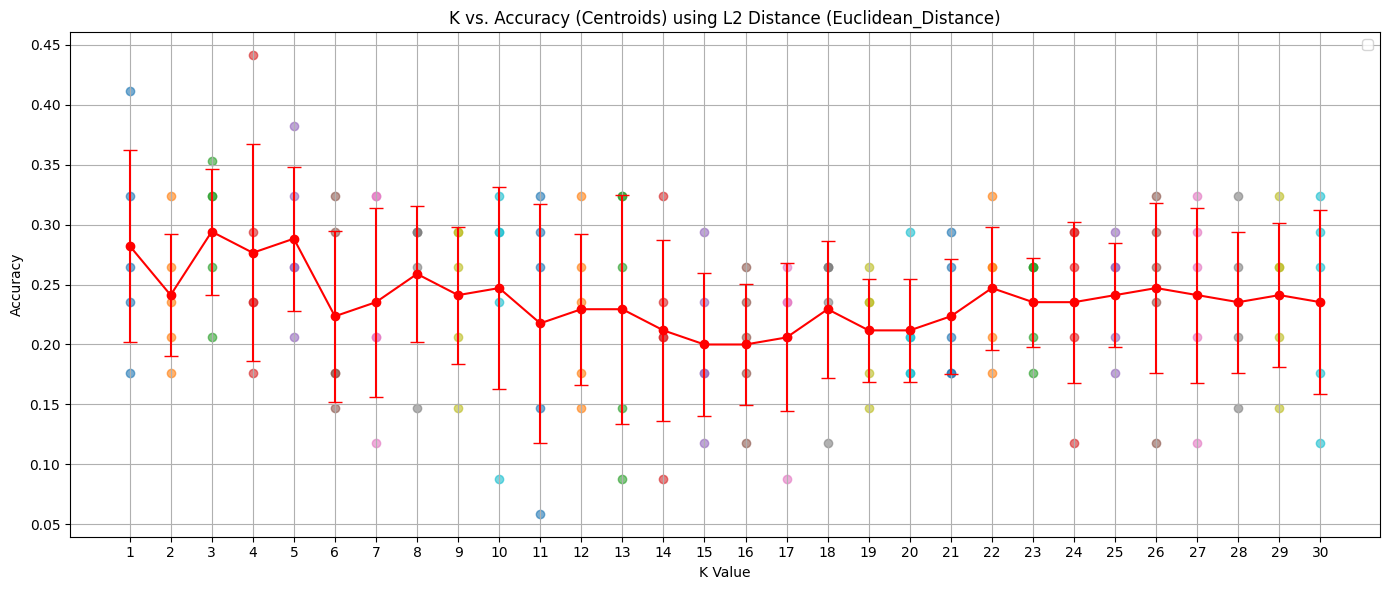

In [12]:
# Generate x-axis values (K values)
x_list = list(average_accuracies.keys())  # Extract K values (keys from the average_accuracies dictionary)

# Create a figure for the plot
plt.figure(figsize=(14, 6))

# Plot accuracies for each fold as scatter points
for k, acc in accuracies.items():
    y_list = acc  # List of accuracies for the current K
    plt.scatter([k] * len(y_list), y_list, alpha=0.6)  # Scatter plot for fold accuracies

# Calculate the trend (mean accuracy for each K) and standard deviation
trend = [np.mean(acc) for acc in accuracies.values()]  # Mean accuracy for each K
std_dev = [np.std(acc) for acc in accuracies.values()]  # Standard deviation for each K

# Plot the trend line with error bars
plt.errorbar(x_list, trend, fmt='-o', yerr=std_dev, capsize=5, color='red')  # Error bars for variability

# Add plot details
plt.title('K vs. Accuracy (Centroids) using L2 Distance (Euclidean_Distance)')  # Title of the plot
plt.xticks(x_list)  # Set x-axis ticks to the K values
plt.grid(True)  # Enable grid for better readability
plt.xlabel('K Value')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend(loc='best', fontsize=10)  # Add legend with best placement
plt.tight_layout()  # Ensure the layout is clean and doesn't overlap

# Display the plot
plt.show()

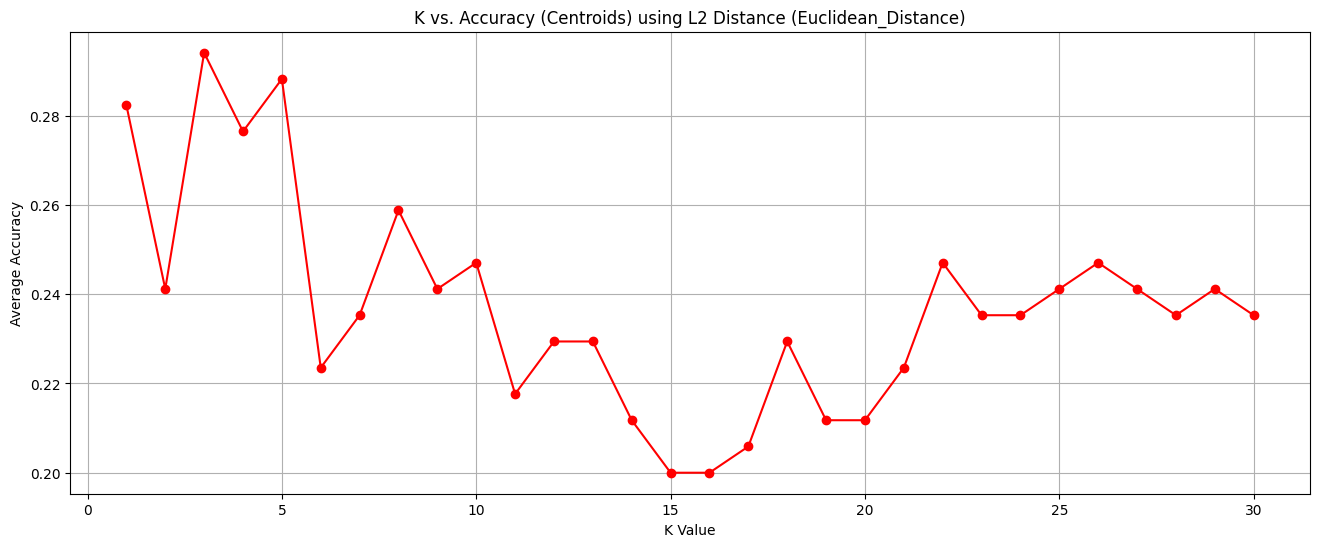

In [13]:
# Plot the results
plt.figure(figsize=(16, 6))  # Set the figure size for the plot

# Plot the average accuracy for each K value
plt.plot(
    list(average_accuracies.keys()),  # X-axis: K values
    list(average_accuracies.values()),  # Y-axis: Average accuracies for each K
    marker='o',  # Marker type to plot each point
    linestyle='-',  # Line style (solid line)
    color='red',  # Line color
    markersize=6,  # Size of the markers
    markerfacecolor='red'  # Color of the markers
)

# Add labels and title
plt.xlabel('K Value')  # X-axis label
plt.ylabel('Average Accuracy')  # Y-axis label
plt.title('K vs. Accuracy (Centroids) using L2 Distance (Euclidean_Distance)')  # Plot title

# Enable the grid for better visualization
plt.grid(True)

# Display the plot
plt.show()